<a href="https://colab.research.google.com/github/Sagar-Kamat/GRIP/blob/main/Prediction_using_Supervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Basic EDA

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.shape

(25, 2)

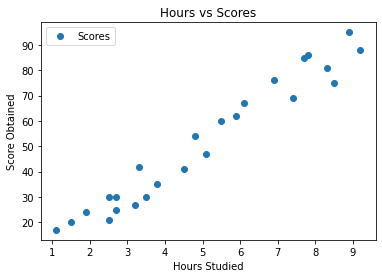

In [8]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score Obtained')  
plt.show()

In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Preparing the model**

In [10]:
#Feature and target variables
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [11]:
# importing essential libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

**Training the model using Simple Linear Regression**

In [13]:
lr = LinearRegression()
lr.fit(X_train ,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
pred = lr.predict(X_test)
print(r2_score(y_test,pred).round(decimals=4)*100)

96.78


In [15]:
lr.score(X_test, y_test)

0.9678055545167994

**Model Evaluation**

Text(0, 0.5, 'Scores')

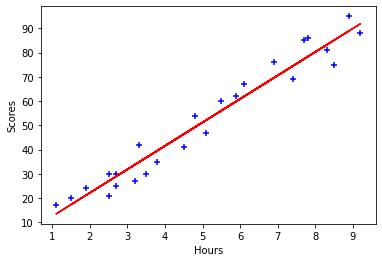

In [16]:
#Plotting results

plt.scatter(df.Hours, df.Scores, marker = '+', color = 'blue')
plt.plot(df.Hours, lr.predict(df[['Hours']]), color = 'red')  #plotting the line of best fit
plt.xlabel('Hours')
plt.ylabel('Scores')

In [17]:
#Model evluation

from sklearn import metrics

predictions = lr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.9207511902099244
MSE: 18.943211722315272
RMSE: 4.352380006653288


In [18]:
# Comparing Actual vs Predicted
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': pred})  
df2

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


**Model Prediction**

In [19]:
# predicting score for 9.25 hours
predicted_value = lr.predict([[9.25]])
print('No of hours =', 9.25)
print('Score = ', predicted_value[0])

No of hours = 9.25
Score =  92.38611528261494
